# Module E 3.4-7

## 3.4 Logistic Regression

Example 1: Simple linear regression model

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [111]:
# The data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [112]:
x
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [113]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [114]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [115]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [116]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [117]:
model.classes_

array([0, 1])

In [118]:
model.intercept_
model.coef_

array([[0.51491375]])

In [119]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [120]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [121]:
model.score(x, y)

0.9

In [122]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

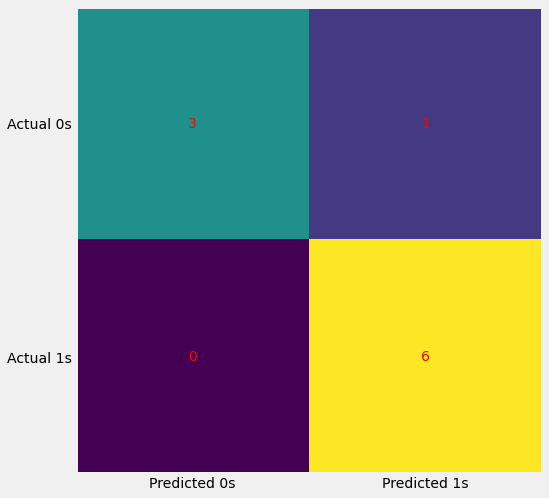

In [123]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [124]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## 3.5 K-means

Example: 

In [125]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [126]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [127]:
features[:5]
true_labels[:5]

array([1, 0, 2, 2, 2])

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [129]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [130]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [131]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [132]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [133]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [134]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [135]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [136]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

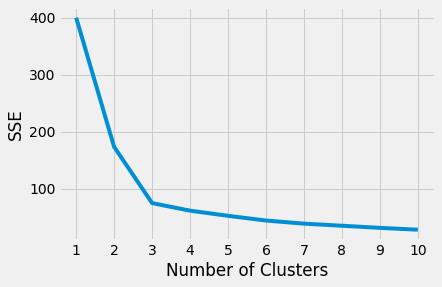

In [137]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

## 3.6 Support Vector Machine

Example:

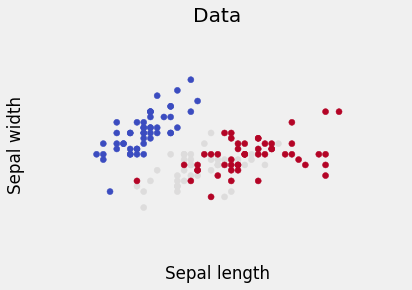

In [138]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Data')
plt.show()

## 3.7 Neural Networks

Example: number recognition 

In [139]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [140]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

train_images shape:  (60000, 28, 28)
train_labels shape:  (60000,)
test_images shape:  (10000, 28, 28)
test_labels shape:  (10000,)


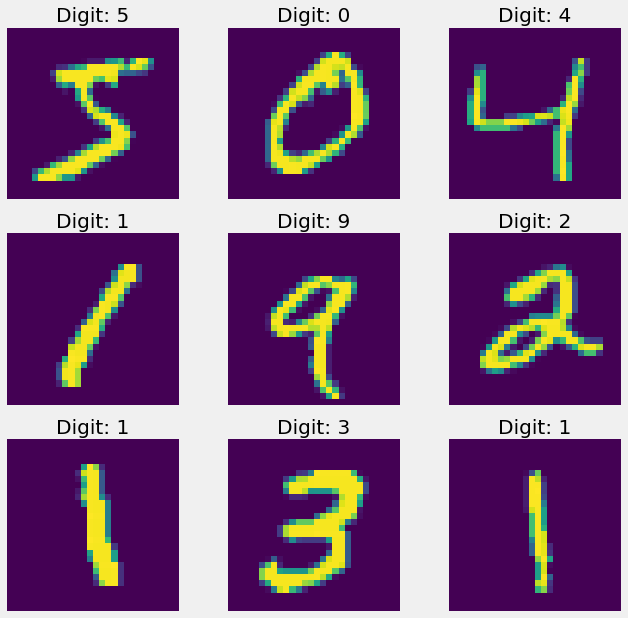

In [141]:
# Printing the shapes
print("train_images shape: ", train_images.shape)
print("train_labels shape: ", train_labels.shape)
print("test_images shape: ", test_images.shape)
print("test_labels shape: ", test_labels.shape)
 
 
# Displaying first 9 images of dataset
fig = plt.figure(figsize=(10,10))
 
nrows=3
ncols=3
for i in range(9):
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(train_images[i])
  plt.title("Digit: {}".format(train_labels[i]))
  plt.axis(False)
plt.show()

In [142]:
# Converting image pixel values to 0 - 1
train_images = train_images / 255
test_images = test_images / 255
 
print("First Label before conversion:")
print(train_labels[0])
 
# Converting labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
 
print("First Label after conversion:")
print(train_labels[0])

First Label before conversion:
5
First Label after conversion:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [143]:
# Using Sequential() to build layers one after another
model = tf.keras.Sequential([
   
  # Flatten Layer that converts images to 1D array
  tf.keras.layers.Flatten(),
   
  # Hidden Layer with 512 units and relu activation
  tf.keras.layers.Dense(units=512, activation='relu'),
   
  # Output Layer with 10 units for 10 classes and softmax activation
  tf.keras.layers.Dense(units=10, activation='softmax')
])

In [144]:
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [145]:
history = model.fit(
  x = train_images,
  y = train_labels,
  epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2004 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0805 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0527 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [146]:
predicted_probabilities = model.predict(test_images)
predicted_classes = tf.argmax(predicted_probabilities, axis=-1).numpy()

Probabilities predicted for image at index 11
[5.1340141e-08 2.9271993e-15 1.8054431e-11 5.4827655e-15 2.0176230e-12
 4.2811923e-09 9.9999905e-01 1.0696724e-13 9.9622662e-07 9.1027677e-16]

Probabilities class for image at index 11
6


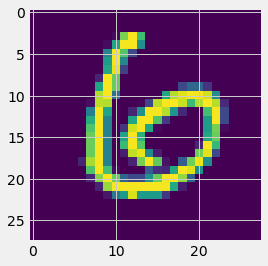

In [147]:
index=11
 
# Showing image
plt.imshow(test_images[index])
 
# Printing Probabilities
print("Probabilities predicted for image at index", index)
print(predicted_probabilities[index])
 
print()
 
# Printing Predicted Class
print("Probabilities class for image at index", index)
print(predicted_classes[index])